# Check SEMITONES marker gene retrieval in the CellMarker database
In this notebook we check how commonly genes that were identified by SEMITONES are found in the human CellMarker database (http://bio-bigdata.hrbmu.edu.cn/CellMarker/download/Human_cell_markers.txt, accessed Janury 7th 2021).

## 1. Set up the notebook

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("../data/external/")  # where the data lives

## 2. Prepare the CellMarker data frame

### a. Load and inspect

In [3]:
CellMarker = pd.read_csv("CellMarker_human_markers.txt", sep="\t")

In [4]:
CellMarker

,speciesType,tissueType,UberonOntologyID,cancerType,cellType,cellName,CellOntologyID,cellMarker,geneSymbol,geneID,proteinName,proteinID,markerResource,PMID,Company
0,Human,Kidney,UBERON_0002113,Normal,Normal cell,Proximal tubular cell,NaN,Intestinal Alkaline Phosphatase,ALPI,248,PPBI,P09923,Experiment,9263997,NaN
1,Human,Liver,UBERON_0002107,Normal,Normal cell,Ito cell (hepatic stellate cell),CL_0000632,Synaptophysin,SYP,6855,SYPH,P08247,Experiment,10595912,NaN
2,Human,Endometrium,UBERON_0001295,Normal,Normal cell,Trophoblast cell,CL_0000351,CEACAM1,CEACAM1,634,CEAM1,P13688,Experiment,10751340,NaN
3,Human,Germ,UBERON_0000923,Normal,Normal cell,Primordial germ cell,CL_0000670,VASA,DDX4,54514,DDX4,Q9NQI0,Experiment,10920202,NaN
4,Human,Corneal epithelium,UBERON_0001772,Normal,Normal cell,Epithelial cell,CL_0000066,KLF6,KLF6,1316,KLF6,Q99612,Experiment,12407152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,Human,Embryo,UBERON_0000922,Normal,Normal cell,1-cell stage cell (Blastomere),CL_0000353,"ACCSL, ACVR1B, ARHGEF16, ASF1B, BCL2L10, BLCAP...","ACCSL, ACVR1B, ARHGEF16, ASF1B, BCL2L10, BLCAP...","390110, 91, 27237, 55723, 10017, 10904, 662, 7...","1A1L2, ACV1B, ARHGG, ASF1B, B2L10, BLCAP, SEC2...","Q4AC99, P36896, Q5VV41, Q9NVP2, Q9HD36, P62952...",Single-cell sequencing,23892778,NaN
2864,Human,Embryo,UBERON_0000922,Normal,Normal cell,4-cell stage cell (Blastomere),CL_0000353,"ADPGK, AIM1, AIMP2, ARG2, ARHGAP17, ARIH1, CDC...","ADPGK, CRYBG1, AIMP2, ARG2, ARHGAP17, ARIH1, C...","83440, 202, 7965, 384, 55114, 25820, 55536, 24...","ADPGK, CRBG1, AIMP2, ARGI2, RHG17, ARI1, CDA7L...","Q9BRR6, Q9Y4K1, Q13155, P78540, Q68EM7, Q9Y4X5...",Single-cell sequencing,23892778,NaN
2865,Human,Embryo,UBERON_0000922,Normal,Normal cell,8-cell stage cell (Blastomere),CL_0000353,"C11orf48, C19orf53, DHX9, DIABLO, EIF1AD, EIF4...","LBHD1, C19orf53, DHX9, DIABLO, EIF1AD, EIF4G1,...","79081, 28974, 1660, 56616, 84285, 1981, 26017,...","LBHD1, L10K, DHX9, DBLOH, EIF1A, IF4G1, FA32A,...","Q9BQE6, Q9UNZ5, Q08211, Q9NR28, Q8N9N8, Q04637...",Single-cell sequencing,23892778,NaN
2866,Human,Embryo,UBERON_0000922,Normal,Normal cell,Morula cell (Blastomere),CL_0000360,"ADCK1, AGL, AIMP1, AKAP12, ARPC3, ATP1B3, ATP5...","ADCK1, AGL, AIMP1, AKAP12, ARPC3, ATP1B3, NA, ...","57143, 178, 9255, 9590, 10094, 483, NA, 586, 9...","ADCK1, GDE, AIMP1, AKA12, ARPC3, AT1B3, AT5F1,...","Q86TW2, P35573, Q12904, Q02952, O15145, P54709...",Single-cell sequencing,23892778,NaN


### b. Subset for blood and immune cell types
We want to make sure the markers we're looking at are specific to blood and immune cell types

In [5]:
terms = [  # a list of terms in expected cell types
    "hematopoietic", "inflammatory", "immune cell", "bone marrow stem cell",
    "leukocyte", "white blood",
    "lymphoid", "lymphocyte", "lymphoblast", "thymocyte",
    "t cell", "regulatory t", "t helper", "memory t", "nk", "natural killer",
    "b cell", "b1 cell", "plasmablast", "plasma",
    "myeloid",
    "mononuclear",
    "granulocyte", "mast cell", "basophil", "eosinophil",
    "monocyte", "macrophage",
    "dendritic cell",
    "erythro", "red blood", "platelet", "megakaryocyte"
]

In [6]:
keep = {name for name in np.unique(CellMarker.cellName)
        for term in terms
        if term in name.lower()}  # only keep names if they contain terms
keep = [name for name in keep
        if (not "t cell" in name.lower()  # to remove ...t cells
             or "mast" in name.lower())   # to keep mast cell( pogenitor)s
            or ("T cell" in name)]  # to keep T cells
keep = [name for name in keep if not "abnormal" in name.lower()]

In [7]:
len(keep)  # how many cell types?

139

In [8]:
keep  # check which cell types

['Regulatory B cell',
 'Natural memory B cell',
 'Granulocyte-monocyte progenitor',
 'CD4+ regulatory T cell',
 'Common lymphoid progenitor',
 'Megakaryocyte progenitor cell',
 'CD4+ T helper cell',
 'Follicular B cell',
 'CD4+ T cell',
 'Bone marrow stem cell',
 'Classical monocyte',
 'Switched memory B cell',
 'Class-switched memory B cell',
 'FOXP3+ natural regulatory T (Treg) cell',
 'Natural killer cell',
 'Plasmablast',
 'Granulocyte',
 'Naive T cell',
 'M1 macrophage',
 'Megakaryocyte erythroid cell',
 'CD8+ T cell',
 'T helper2 (Th2) cell',
 'Immune cell',
 'Follicular T cell',
 'CD1C+_B dendritic cell',
 'Megakaryocyte-erythroid progenitor',
 'Platelet',
 'Natural regulatory T (Treg) cell',
 'CD4+CD25+ regulatory T cell',
 'Atypical memory B cell',
 'Myeloid stem cell',
 'Proerythroblast',
 'Monocyte derived dendritic cell',
 'Suppressive monocyte',
 'Immature myeloid cell',
 'Immature transitional B cell',
 'Plasma cell',
 'Memory T cell',
 'Effector memory T cell',
 'CD1C-CD

In [9]:
CellMarker = CellMarker[CellMarker.cellName.isin(keep)]
CellMarker = CellMarker.reset_index(drop=True)

In [10]:
CellMarker

,speciesType,tissueType,UberonOntologyID,cancerType,cellType,cellName,CellOntologyID,cellMarker,geneSymbol,geneID,proteinName,proteinID,markerResource,PMID,Company
0,Human,Peripheral blood,UBERON_0005408,Normal,Normal cell,Monocyte,CL_0000576,"CD11b, CD16, CD19, CD2, CD3, CD56, CD94, NKG2A","ITGAM, [FCGR3A, FCGR3B], CD19, CD2, [CD3D, CD3...","3684, [2214, 2215], 930, 914, [915, 916, 917],...","ITAM, [FCG3A, FCG3B], CD19, CD2, [CD3D, CD3E, ...","P11215, [P08637, O75015], P15391, P06729, [P04...",Experiment,29610856,NaN
1,Human,Blood,UBERON_0000178,Normal,Normal cell,Natural killer cell,CL_0000623,"CD11b, CD16, CD19, CD2, CD3, CD56, CD94, NKG2A","ITGAM, [FCGR3A, FCGR3B], CD19, CD2, [CD3D, CD3...","3684, [2214, 2215], 930, 914, [915, 916, 917],...","ITAM, [FCG3A, FCG3B], CD19, CD2, [CD3D, CD3E, ...","P11215, [P08637, O75015], P15391, P06729, [P04...",Experiment,29610856,NaN
2,Human,Peripheral blood,UBERON_0005408,Normal,Normal cell,Monocyte,CL_0000576,"CD14, CD19, CD20, CD27, CD3, CD38, IgA, IgG","CD14, CD19, MS4A1, CD27, [CD3D, CD3E, CD3G], C...","929, 930, 931, 939, [915, 916, 917], 952, 973,...","CD14, CD19, CD20, CD27, [CD3D, CD3E, CD3G], CD...","P08571, P15391, P11836, P26842, [P04234, P0776...",Experiment,29579044,NaN
3,Human,Breast,UBERON_0000310,Normal,Normal cell,Natural killer cell,CL_0000623,CD56,NCAM1,4684,NCAM1,P13591,Experiment,29090365,NaN
4,Human,Peripheral blood,UBERON_0005408,Normal,Normal cell,B cell,CL_0000236,"CD19, CD27, CD38, CD45, IgD, ZAP70","CD19, CD27, CD38, PTPRC, IgD family, ZAP70","930, 939, 952, 5788, IgD family, 7535","CD19, CD27, CD38, PTPRC, IgD family, ZAP70","P15391, P26842, P28907, P08575, IgD family, P4...",Experiment,25187226,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Human,Fetal kidney,UBERON_0002120,Normal,Normal cell,Monocyte,CL_0000576,"ABTB1, ACAA1, ACAP2, ACPP, ACSL1, ACSL3, ACTN1...","ABTB1, ACAA1, ACAP2, ACPP, ACSL1, ACSL3, ACTN1...","80325, 30, 23527, 55, 2180, 2181, 87, 10097, 6...","ABTB1, THIK, ACAP2, PPAP, ACSL1, ACSL3, ACTN1,...","Q969K4, P09110, Q15057, P15309, P33121, O95573...",Single-cell sequencing,30093597,NaN
840,Human,Kidney,UBERON_0002113,Normal,Normal cell,B cell,CL_0000236,"ABCB4, ABCB9, ABHD10, ACAD10, ACBD3, ACP5, ACS...","ABCB4, ABCB9, ABHD10, ACAD10, ACBD3, ACP5, ACS...","5244, 23457, 55347, 80724, 64746, 54, 123876, ...","MDR3, ABCB9, ABHDA, ACD10, GCP60, PPA5, ACS2A,...","P21439, Q9NP78, Q9NUJ1, Q6JQN1, Q9H3P7, P13686...",Single-cell sequencing,30093597,NaN
841,Human,Kidney,UBERON_0002113,Normal,Normal cell,Mast cell,CL_0000097,"ABCA1, AC004791.2, ACSL4, ADCYAP1, ADIRF, ADRB...","ABCA1, NA, ACSL4, ADCYAP1, ADIRF, ADRB2, ALOX5...","19, NA, 2182, 116, 10974, 154, 240, 241, 307, ...","ABCA1, NA, ACSL4, PACA, ADIRF, ADRB2, LOX5, AL...","O95477, NA, O60488, P18509, Q15847, P07550, P0...",Single-cell sequencing,30093597,NaN
842,Human,Kidney,UBERON_0002113,Renal Cell Carcinoma,Cancer cell,Plasma cell,CL_0000786,"AC026202.3, AC104699.1, AL928768.3, BRSK1, CD7...","NA, NA, NA, BRSK1, CD79A, CPNE5, DERL3, ENAM, ...","NA, NA, NA, 84446, 973, 57699, 91319, 10117, 8...","NA, NA, NA, BRSK1, CD79A, CPNE5, DERL3, ENAM, ...","NA, NA, NA, Q8TDC3, P11912, Q9HCH3, Q96Q80, Q9...",Single-cell sequencing,30093597,NaN


### c. Annotate confident, non-confident and non-markers

In [11]:
# make list readable
for r in (("[", ""), ("]", ""), (" ", "")):
    CellMarker.geneSymbol = CellMarker.geneSymbol.str.replace(*r)
CellMarker.geneSymbol = CellMarker.geneSymbol.str.split(",")

In [12]:
# clean up marker lists
markers = [gene if not isinstance(gene, float) else []
           for gene in list(CellMarker.geneSymbol.values)]  # nan to []
markers = [list(filter(None, gene)) for gene in markers]  # remove empties

In [13]:
CellMarker.geneSymbol = markers  # replace markers with cleaned up list

In [14]:
CellMarker.geneSymbol

0      [ITGAM, FCGR3A, FCGR3B, CD19, CD2, CD3D, CD3E,...
1      [ITGAM, FCGR3A, FCGR3B, CD19, CD2, CD3D, CD3E,...
2      [CD14, CD19, MS4A1, CD27, CD3D, CD3E, CD3G, CD...
3                                                [NCAM1]
4            [CD19, CD27, CD38, PTPRC, IgDfamily, ZAP70]
                             ...                        
839    [ABTB1, ACAA1, ACAP2, ACPP, ACSL1, ACSL3, ACTN...
840    [ABCB4, ABCB9, ABHD10, ACAD10, ACBD3, ACP5, AC...
841    [ABCA1, NA, ACSL4, ADCYAP1, ADIRF, ADRB2, ALOX...
842    [NA, NA, NA, BRSK1, CD79A, CPNE5, DERL3, ENAM,...
843    [ABCB4, ACSM3, ADAM28, AFF3, AFF4, AIDA, AIM2,...
Name: geneSymbol, Length: 844, dtype: object

In [15]:
# get a list of unique marker genes
markers = [gene for genes in markers for gene in genes]
markers = np.unique(markers)

In [16]:
np.unique(markers)

array(['11-Sep', 'A2M', 'A4GALT', ..., 'ZYX', 'ZZEF1',
       'macrophagegalactose-typeC-typelectinfamily'], dtype='<U42')

In [17]:
sources = {k: [] for k in markers}
for i, row in CellMarker.iterrows():  # for each cell type
    for gene in row.geneSymbol:  # for each gene
        sources[gene].append(row.PMID)  # add the source
confidence = {}
for k, v in sources.items():
    if len(np.unique(v)) >= 3:  # if in at least 3 papers
        confidence[k] = "high"
    else:
        confidence[k] = "low"

In [18]:
highconf = [k for k in confidence.keys() if confidence[k] == "high"]
lowconf = [k for k in confidence.keys() if confidence[k] == "low"]

## 3. Check how often SEMITONES genes are known markers

### a. Rank SEMITONES scores

In [19]:
escores = pd.read_csv("../processed/greenleaf_scRNA_escores_knn_rbf_8e-1.txt",
                      sep="\t", index_col=0)

In [20]:
# pick the highest rank for each gene
ranked = escores.rank(ascending=False, method="dense").min(1)

### b. Check retrieval per rank-bin
Count for how many of the markers in each 25-rank bin are in the high-confidence markers, low-confidence markers or not in the marker gene database.

In [21]:
intervals = np.arange(0, 1025, 25)  # get 25-rank bins
counts = {}
for i in range(len(intervals) - 1):
    lower, upper = intervals[i], intervals[i + 1]  # get lower and upper bound
    counts[upper] = {}  # store based on the upper limit
    
    inbin = ranked[(ranked >= lower) & (ranked < upper)].index

    n_highconf = len([i for i in inbin if i in highconf])
    n_lowconf = len([i for i in inbin if i in lowconf])
    n_nomark = len([i for i in inbin if i not in highconf + lowconf])
    
    n_genes = len(inbin)

    counts[upper]["freq_highconf"] = n_highconf / n_genes
    counts[upper]["freq_lowconf"] = n_lowconf / n_genes
    counts[upper]["freq_nomark"] = n_nomark / n_genes
counts = pd.DataFrame(counts).T

### c. Plot retrieval per rank-bin

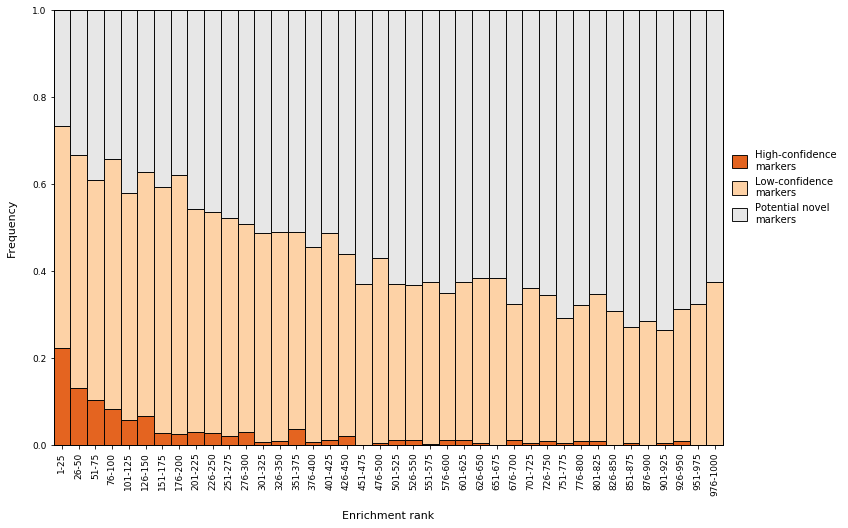

In [22]:
N = len(counts.index)  # number of bins
x = np.arange(N)  # x-axis location
width = 1  # bar width

x_labels = [f"{i+1}-{i+25}" for i in np.arange(0, 1000, 25)]

plt.figure(figsize=(6*2, 4*2))

p1 = plt.bar(x, counts.freq_highconf, width,
             color="#e15307", alpha=0.9, edgecolor="black", linewidth=1,
             label="High-confidence\nmarkers")

bottom = counts.freq_highconf
p2 = plt.bar(x, counts.freq_lowconf, width, bottom=bottom,
             color="#fdcd9c", alpha=0.9, edgecolor="black", linewidth=1,
             label="Low-confidence\nmarkers")

bottom = counts.freq_highconf + counts.freq_lowconf
p3 = plt.bar(x, counts.freq_nomark, width, bottom=bottom,
             color="#e5e5e5", alpha=0.9, edgecolor="black", linewidth=1,
             label="Potential novel\nmarkers")

leg = plt.legend(fontsize=10, handlelength=1.5, handleheight=1.7,
                 bbox_to_anchor=(1, 0.7), frameon=False)

plt.xticks(range(N), x_labels, rotation=90, fontsize=9)
plt.ylabel("Frequency", labelpad=15, fontsize=11)
plt.xlabel("Enrichment rank", labelpad=15, fontsize=11)
plt.yticks(fontsize=9)
plt.xlim(-.5,39.5)
plt.ylim(0,1)

for k,v in plt.gca().spines.items():
    plt.gca().spines[k].set_color("black")
    plt.gca().spines[k].set_linewidth(1)